In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("pima-indians-diabetes.csv", names = ['pregnant', 'plasma', 'pressure', 'thickness', 'lnsulin', 'BMI', 'pedigree', 'age', 'class'])

In [10]:
df.head()

,pregnant,plasma,pressure,thickness,lnsulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   lnsulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,pregnant,plasma,pressure,thickness,lnsulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [14]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


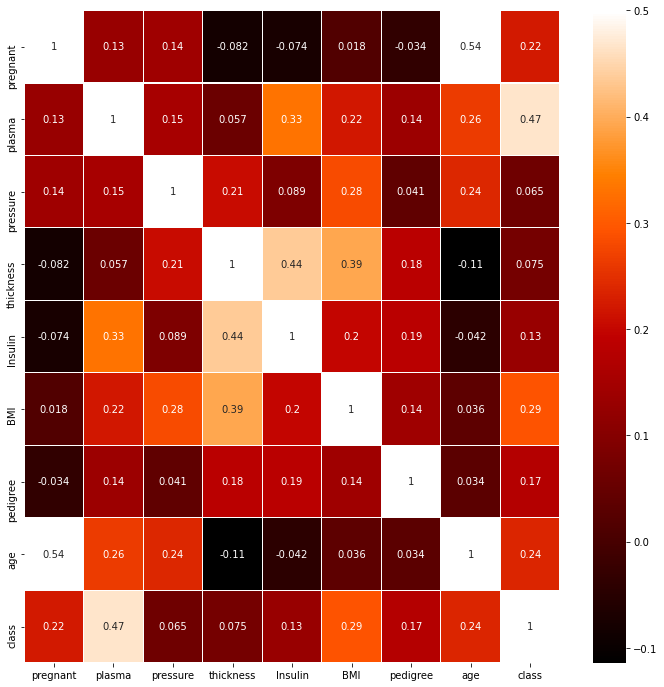

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor='white', annot = True)

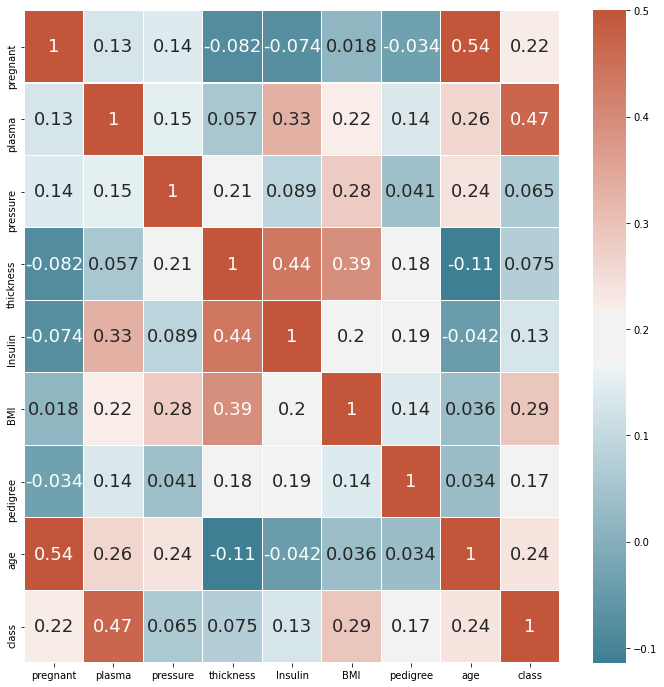

In [16]:
plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax = 0.5, cmap = sns.diverging_palette(220,20,sep=20,as_cmap = True), linecolor='white', annot = True, annot_kws={'size':18})
plt.show()

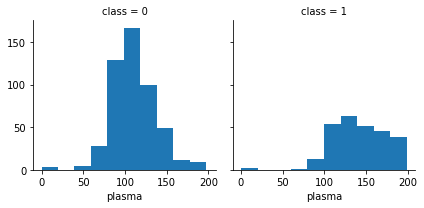

In [17]:
grid = sns.FacetGrid(df, col = 'class') ## 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는것과 같다. 
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [58]:
from keras.models import Sequential
from keras.layers import Dense

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

data = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = data[:,0:8]
Y = data[:,8]


In [59]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim = 8, activation = 'relu'))
model.add(Dense(100,input_dim = 8, activation = 'relu'))
model.add(Dense(100,input_dim = 8, activation = 'relu'))## 은닉층, 노드갯수 30개, 입력변수 17개
model.add(Dense(1,activation = 'sigmoid')) ## 출력층, 노드갯수 1개
# model.add(Dense(1,activation = 'relu'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X,Y, epochs = 1000, batch_size = 10)

print("\n Accuracy : %.4f"%(model.evaluate(X,Y)[1]))

In [36]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

data = pd.read_csv("iris.csv", names = ['s.l', 's.w', 'p.l', 'p.w', 'class'])
# data.rename(columns={0: 's.l', 1: 's.w', 2:'p.l', 3:'p.w', 4:'species'}, inplace=True)

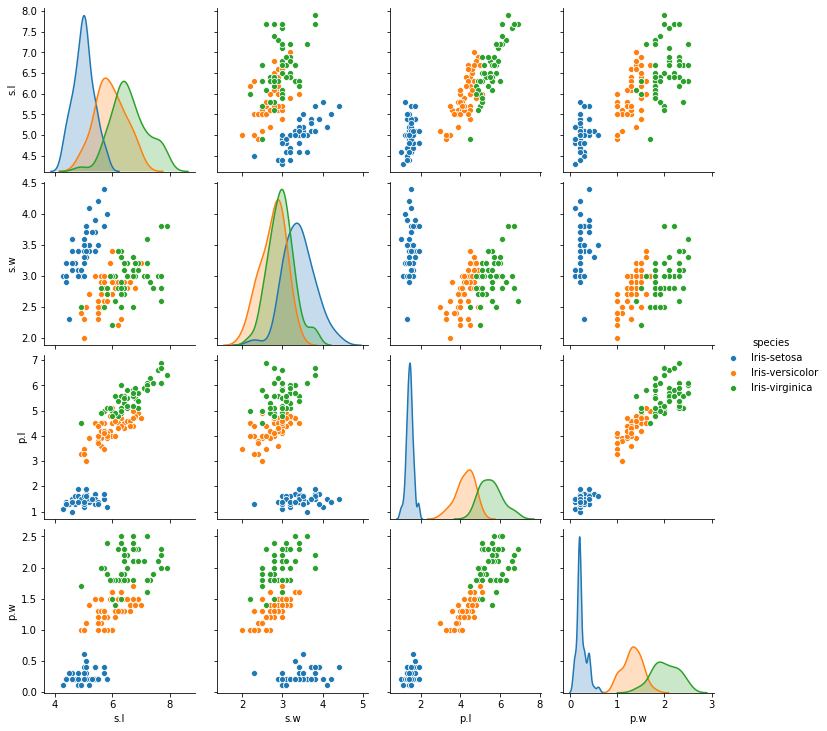

In [21]:
sns.pairplot(data, hue = 'species')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("iris.csv", names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [92]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

In [98]:
model = Sequential()
model.add(Dense(20,input_dim = 4, activation = 'relu'))
model.add(Dense(20,input_dim = 4, activation = 'relu'))
model.add(Dense(20,input_dim = 4, activation = 'relu'))## 은닉층, 노드갯수 16개, 입력변수 4개
model.add(Dense(3,activation = 'softmax')) ## 출력층, 노드갯수 3개 : 꽃의 종류, softmax는 다중분류!

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X,Y_encoded, epochs = 100, batch_size = 1)
print("\n Accuracy : %.4f"%(model.evaluate(X,Y_encoded)[1]))

Epoch 1/100
150/150 [==============================] - 0s 490us/step - loss: 1.0057 - accuracy: 0.4600
Epoch 2/100
150/150 [==============================] - 0s 441us/step - loss: 0.6559 - accuracy: 0.7400
Epoch 3/100
150/150 [==============================] - 0s 450us/step - loss: 0.4504 - accuracy: 0.8400
Epoch 4/100
150/150 [==============================] - 0s 496us/step - loss: 0.3599 - accuracy: 0.8733
Epoch 5/100
150/150 [==============================] - 0s 447us/step - loss: 0.3206 - accuracy: 0.8400
Epoch 6/100
150/150 [==============================] - 0s 579us/step - loss: 0.2848 - accuracy: 0.8933
Epoch 7/100
150/150 [==============================] - 0s 549us/step - loss: 0.2241 - accuracy: 0.9467
Epoch 8/100
150/150 [==============================] - 0s 565us/step - loss: 0.2024 - accuracy: 0.9333
Epoch 9/100
150/150 [==============================] - 0s 550us/step - loss: 0.1777 - accuracy: 0.9667
Epoch 10/100
150/150 [==============================] - 0s 488us/step - l

In [138]:
df = pd.read_csv("sonar.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [108]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

dataset = df.values
X = dataset[:,0:60].astype('float')
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
# Y_encoded = np_utils.to_categorical(Y)

model = Sequential()
model.add(Dense(24,input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [109]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [111]:
model.fit(X,Y, epochs = 100, batch_size = 1)
print("\n Accuracy : %.4f"%(model.evaluate(X,Y)[1]))

Epoch 1/100
208/208 [==============================] - 0s 523us/step - loss: 0.2434 - accuracy: 0.5433
Epoch 2/100
208/208 [==============================] - 0s 595us/step - loss: 0.2394 - accuracy: 0.5673
Epoch 3/100
208/208 [==============================] - 0s 504us/step - loss: 0.2263 - accuracy: 0.6154
Epoch 4/100
208/208 [==============================] - 0s 461us/step - loss: 0.2164 - accuracy: 0.6923
Epoch 5/100
208/208 [==============================] - 0s 561us/step - loss: 0.2069 - accuracy: 0.7019
Epoch 6/100
208/208 [==============================] - 0s 564us/step - loss: 0.1892 - accuracy: 0.7740
Epoch 7/100
208/208 [==============================] - 0s 586us/step - loss: 0.1752 - accuracy: 0.7500
Epoch 8/100
208/208 [==============================] - 0s 581us/step - loss: 0.1588 - accuracy: 0.8029
Epoch 9/100
208/208 [==============================] - 0s 580us/step - loss: 0.1521 - accuracy: 0.7981
Epoch 10/100
208/208 [==============================] - 0s 574us/step - l

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = seed)

model = Sequential()
model.add(Dense(24,input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 130, batch_size = 5)
print("\n Test Accuracy : %.4f"%(model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 588us/step - loss: 0.2538 - accuracy: 0.4483
Epoch 2/130
29/29 [==============================] - 0s 583us/step - loss: 0.2486 - accuracy: 0.5103
Epoch 3/130
29/29 [==============================] - 0s 584us/step - loss: 0.2434 - accuracy: 0.6069
Epoch 4/130
29/29 [==============================] - 0s 606us/step - loss: 0.2316 - accuracy: 0.6483
Epoch 5/130
29/29 [==============================] - 0s 617us/step - loss: 0.2193 - accuracy: 0.6483
Epoch 6/130
29/29 [==============================] - 0s 516us/step - loss: 0.2061 - accuracy: 0.7379
Epoch 7/130
29/29 [==============================] - 0s 571us/step - loss: 0.1962 - accuracy: 0.7103
Epoch 8/130
29/29 [==============================] - 0s 518us/step - loss: 0.1916 - accuracy: 0.7310
Epoch 9/130
29/29 [==============================] - 0s 546us/step - loss: 0.1778 - accuracy: 0.7931
Epoch 10/130
29/29 [==============================] - 0s 576us/step - loss: 0.1663 - accura

In [124]:
from keras.models import load_model

model.save('my_model.h5') ## 모델 결과 저장

In [125]:
del model
model = load_model('my_model.h5') ## 모델 결과 불러오기

In [126]:
model.fit(X_train, Y_train, epochs = 130, batch_size = 5)
print("\n Test Accuracy : %.4f"%(model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 619us/step - loss: 1.2624e-04 - accuracy: 1.0000
Epoch 2/130
29/29 [==============================] - 0s 648us/step - loss: 1.1331e-04 - accuracy: 1.0000
Epoch 3/130
29/29 [==============================] - 0s 617us/step - loss: 1.1841e-04 - accuracy: 1.0000
Epoch 4/130
29/29 [==============================] - 0s 651us/step - loss: 1.1161e-04 - accuracy: 1.0000
Epoch 5/130
29/29 [==============================] - 0s 619us/step - loss: 1.0679e-04 - accuracy: 1.0000
Epoch 6/130
29/29 [==============================] - 0s 685us/step - loss: 1.0677e-04 - accuracy: 1.0000
Epoch 7/130
29/29 [==============================] - 0s 642us/step - loss: 1.1082e-04 - accuracy: 1.0000
Epoch 8/130
29/29 [==============================] - 0s 609us/step - loss: 1.1059e-04 - accuracy: 1.0000
Epoch 9/130
29/29 [==============================] - 0s 632us/step - loss: 1.0468e-04 - accuracy: 1.0000
Epoch 10/130
29/29 [==============================] - 0

In [139]:
from sklearn.model_selection import StratifiedKFold

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("sonar.csv", header=None)

dataset = df.values
X = dataset[:,0:60].astype('float')
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state = seed)

accuracy = []

for train, test in skf.split(X,Y) : ## skf는 10차 교차검증
    model = Sequential()
    model.add(Dense(24,input_dim = 60, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
    
    X_train = tf.convert_to_tensor(X[train], dtype = tf.float32)
    Y_train = tf.convert_to_tensor(Y[train], dtype = tf.float32)
    
    model.fit(X_train, Y_train, epochs = 100, batch_size = 5)
    X_test = tf.convert_to_tensor(X[test], dtype = tf.float32)
    Y_test = tf.convert_to_tensor(Y[test], dtype = tf.float32)
    k_accuracy = "%.4f"%(model.evaluate(X_test, Y_test)[1])
    accuracy.append(k_accuracy)
    
print("\n%.f fold accurcy : "%n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 603us/step - loss: 0.2426 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 604us/step - loss: 0.2260 - accuracy: 0.6578
Epoch 3/100
38/38 [==============================] - 0s 613us/step - loss: 0.2156 - accuracy: 0.7326
Epoch 4/100
38/38 [==============================] - 0s 624us/step - loss: 0.2057 - accuracy: 0.7487
Epoch 5/100
38/38 [==============================] - 0s 618us/step - loss: 0.1946 - accuracy: 0.7219
Epoch 6/100
38/38 [==============================] - 0s 602us/step - loss: 0.1843 - accuracy: 0.7540
Epoch 7/100
38/38 [==============================] - 0s 630us/step - loss: 0.1730 - accuracy: 0.7861
Epoch 8/100
38/38 [==============================] - 0s 631us/step - loss: 0.1631 - accuracy: 0.8075
Epoch 9/100
38/38 [==============================] - 0s 624us/step - loss: 0.1559 - accuracy: 0.8075
Epoch 10/100
38/38 [==============================] - 0s 620us/step - loss: 0.1504 - accura

38/38 [==============================] - 0s 654us/step - loss: 0.0843 - accuracy: 0.8877
Epoch 54/100
38/38 [==============================] - 0s 654us/step - loss: 0.0869 - accuracy: 0.8824
Epoch 55/100
38/38 [==============================] - 0s 667us/step - loss: 0.0804 - accuracy: 0.9091
Epoch 56/100
38/38 [==============================] - 0s 640us/step - loss: 0.0791 - accuracy: 0.9037
Epoch 57/100
38/38 [==============================] - 0s 641us/step - loss: 0.0815 - accuracy: 0.8770
Epoch 58/100
38/38 [==============================] - 0s 650us/step - loss: 0.0785 - accuracy: 0.9144
Epoch 59/100
38/38 [==============================] - 0s 649us/step - loss: 0.0764 - accuracy: 0.9305
Epoch 60/100
38/38 [==============================] - 0s 674us/step - loss: 0.0768 - accuracy: 0.8930
Epoch 61/100
38/38 [==============================] - 0s 672us/step - loss: 0.0747 - accuracy: 0.9198
Epoch 62/100
38/38 [==============================] - 0s 611us/step - loss: 0.0766 - accuracy: 

1/1 [==============================] - 0s 0s/step - loss: 0.1972 - accuracy: 0.7619
Epoch 1/100
38/38 [==============================] - 0s 604us/step - loss: 0.2516 - accuracy: 0.5134
Epoch 2/100
38/38 [==============================] - 0s 525us/step - loss: 0.2400 - accuracy: 0.5989
Epoch 3/100
38/38 [==============================] - 0s 507us/step - loss: 0.2329 - accuracy: 0.6738
Epoch 4/100
38/38 [==============================] - 0s 576us/step - loss: 0.2261 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 570us/step - loss: 0.2177 - accuracy: 0.7059
Epoch 6/100
38/38 [==============================] - 0s 643us/step - loss: 0.2092 - accuracy: 0.7059
Epoch 7/100
38/38 [==============================] - 0s 644us/step - loss: 0.1988 - accuracy: 0.7594
Epoch 8/100
38/38 [==============================] - 0s 635us/step - loss: 0.1883 - accuracy: 0.8021
Epoch 9/100
38/38 [==============================] - 0s 692us/step - loss: 0.1791 - accuracy: 0.8021
Epoch 1

38/38 [==============================] - 0s 584us/step - loss: 0.0400 - accuracy: 0.9679
Epoch 50/100
38/38 [==============================] - 0s 570us/step - loss: 0.0388 - accuracy: 0.9626
Epoch 51/100
38/38 [==============================] - 0s 615us/step - loss: 0.0389 - accuracy: 0.9572
Epoch 52/100
38/38 [==============================] - 0s 515us/step - loss: 0.0350 - accuracy: 0.9733
Epoch 53/100
38/38 [==============================] - 0s 521us/step - loss: 0.0344 - accuracy: 0.9786
Epoch 54/100
38/38 [==============================] - 0s 570us/step - loss: 0.0348 - accuracy: 0.9840
Epoch 55/100
38/38 [==============================] - 0s 574us/step - loss: 0.0329 - accuracy: 0.9733
Epoch 56/100
38/38 [==============================] - 0s 575us/step - loss: 0.0297 - accuracy: 0.9786
Epoch 57/100
38/38 [==============================] - 0s 587us/step - loss: 0.0255 - accuracy: 0.9947
Epoch 58/100
38/38 [==============================] - 0s 490us/step - loss: 0.0258 - accuracy: 

1/1 [==============================] - 0s 0s/step - loss: 0.1501 - accuracy: 0.7619
Epoch 1/100
38/38 [==============================] - 0s 588us/step - loss: 0.2412 - accuracy: 0.5668
Epoch 2/100
38/38 [==============================] - 0s 488us/step - loss: 0.2277 - accuracy: 0.6524
Epoch 3/100
38/38 [==============================] - 0s 532us/step - loss: 0.2170 - accuracy: 0.6791
Epoch 4/100
38/38 [==============================] - 0s 592us/step - loss: 0.2086 - accuracy: 0.7166
Epoch 5/100
38/38 [==============================] - 0s 520us/step - loss: 0.1996 - accuracy: 0.7112
Epoch 6/100
38/38 [==============================] - 0s 470us/step - loss: 0.1916 - accuracy: 0.7807
Epoch 7/100
38/38 [==============================] - 0s 479us/step - loss: 0.1820 - accuracy: 0.7701
Epoch 8/100
38/38 [==============================] - 0s 598us/step - loss: 0.1716 - accuracy: 0.7968
Epoch 9/100
38/38 [==============================] - 0s 597us/step - loss: 0.1643 - accuracy: 0.8021
Epoch 1

38/38 [==============================] - 0s 445us/step - loss: 0.0650 - accuracy: 0.9358
Epoch 44/100
38/38 [==============================] - 0s 456us/step - loss: 0.0691 - accuracy: 0.9037
Epoch 45/100
38/38 [==============================] - 0s 448us/step - loss: 0.0642 - accuracy: 0.9198
Epoch 46/100
38/38 [==============================] - 0s 420us/step - loss: 0.0682 - accuracy: 0.9144
Epoch 47/100
38/38 [==============================] - 0s 420us/step - loss: 0.0651 - accuracy: 0.9198
Epoch 48/100
38/38 [==============================] - 0s 443us/step - loss: 0.0630 - accuracy: 0.9358
Epoch 49/100
38/38 [==============================] - 0s 468us/step - loss: 0.0584 - accuracy: 0.9358
Epoch 50/100
38/38 [==============================] - 0s 539us/step - loss: 0.0582 - accuracy: 0.9251
Epoch 51/100
38/38 [==============================] - 0s 642us/step - loss: 0.0568 - accuracy: 0.9305
Epoch 52/100
38/38 [==============================] - 0s 678us/step - loss: 0.0554 - accuracy: 

38/38 [==============================] - 0s 551us/step - loss: 0.0325 - accuracy: 0.9787
Epoch 96/100
38/38 [==============================] - 0s 543us/step - loss: 0.0328 - accuracy: 0.9787
Epoch 97/100
38/38 [==============================] - 0s 559us/step - loss: 0.0292 - accuracy: 0.9840
Epoch 98/100
38/38 [==============================] - 0s 572us/step - loss: 0.0319 - accuracy: 0.9840
Epoch 99/100
38/38 [==============================] - 0s 546us/step - loss: 0.0323 - accuracy: 0.9734
Epoch 100/100
1/1 [==============================] - 0s 1000us/step - loss: 0.0946 - accuracy: 0.9500
Epoch 1/100
38/38 [==============================] - 0s 602us/step - loss: 0.2483 - accuracy: 0.5372
Epoch 2/100
38/38 [==============================] - 0s 476us/step - loss: 0.2414 - accuracy: 0.5638
Epoch 3/100
38/38 [==============================] - 0s 502us/step - loss: 0.2369 - accuracy: 0.5798
Epoch 4/100
38/38 [==============================] - 0s 628us/step - loss: 0.2301 - accuracy: 0.63

In [132]:
for train, test in skf.split(X,Y) :
    print(train)
    print(test)
    break

[  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  20
  21  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38  39  41
  42  43  45  46  47  48  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 118 120
 121 123 124 125 126 127 129 130 131 132 133 134 135 136 137 138 139 140
 142 143 144 145 146 147 148 149 150 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 192 193 194 195 198 199
 200 201 202 203 205 206 207]
[  2  14  19  22  26  40  44  49  52  91 100 117 119 122 128 141 151 191
 196 197 204]


## 과적합

In [146]:
df = pd.read_csv("wine.csv", header=None)
df = df.sample(frac=1) ## frac=1 : 원본데이터 100퍼 불러와라

In [152]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
3266,8.8,0.39,0.34,5.9,0.055,33.0,128.0,0.99270,2.95,0.51,11.8,6,0
5478,6.8,0.73,0.20,6.6,0.054,25.0,65.0,0.99324,3.12,0.28,11.1,4,0
1670,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.99580,3.32,0.60,9.5,5,0
4472,5.8,0.21,0.32,1.6,0.045,38.0,95.0,0.98946,3.23,0.94,12.4,8,0
4939,6.2,0.30,0.31,1.2,0.048,19.0,125.0,0.98999,3.32,0.54,12.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,7.4,0.31,0.26,8.6,0.048,47.0,206.0,0.99640,3.26,0.36,9.1,5,0
6176,6.3,0.15,0.34,11.4,0.050,25.0,96.0,0.99754,3.21,0.49,10.0,6,0
2603,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6,0
2775,6.3,0.32,0.35,11.1,0.039,29.0,198.0,0.99840,3.36,0.50,9.4,7,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3266 to 3781
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [155]:
dataset = df.values
X = dataset[:,0:12].astype('float')
Y_obj = dataset[:,12]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(30,input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

X_train = tf.convert_to_tensor(X[train], dtype = tf.float32)
Y_train = tf.convert_to_tensor(Y[train], dtype = tf.float32)

model.fit(X_train, Y_train, epochs = 200, batch_size = 200)
print("\n%.f fold accurcy : "%n_fold, accuracy)

Epoch 1/200
30/30 [==============================] - 0s 643us/step - loss: 0.8019 - accuracy: 0.7703
Epoch 2/200
30/30 [==============================] - 0s 767us/step - loss: 0.2759 - accuracy: 0.9036
Epoch 3/200
30/30 [==============================] - 0s 732us/step - loss: 0.2264 - accuracy: 0.9304
Epoch 4/200
30/30 [==============================] - 0s 785us/step - loss: 0.2147 - accuracy: 0.9292
Epoch 5/200
30/30 [==============================] - 0s 731us/step - loss: 0.2076 - accuracy: 0.9284
Epoch 6/200
30/30 [==============================] - 0s 706us/step - loss: 0.2010 - accuracy: 0.9313
Epoch 7/200
30/30 [==============================] - 0s 662us/step - loss: 0.1963 - accuracy: 0.9321
Epoch 8/200
30/30 [==============================] - 0s 625us/step - loss: 0.1922 - accuracy: 0.9338
Epoch 9/200
30/30 [==============================] - 0s 691us/step - loss: 0.1876 - accuracy: 0.9330
Epoch 10/200
30/30 [==============================] - 0s 682us/step - loss: 0.1847 - accura

30/30 [==============================] - 0s 733us/step - loss: 0.0393 - accuracy: 0.9896
Epoch 161/200
30/30 [==============================] - 0s 761us/step - loss: 0.0409 - accuracy: 0.9885
Epoch 162/200
30/30 [==============================] - 0s 696us/step - loss: 0.0387 - accuracy: 0.9891
Epoch 163/200
30/30 [==============================] - 0s 765us/step - loss: 0.0381 - accuracy: 0.9904
Epoch 164/200
30/30 [==============================] - 0s 757us/step - loss: 0.0362 - accuracy: 0.9909
Epoch 165/200
30/30 [==============================] - 0s 734us/step - loss: 0.0367 - accuracy: 0.9903
Epoch 166/200
30/30 [==============================] - 0s 704us/step - loss: 0.0407 - accuracy: 0.9897
Epoch 167/200
30/30 [==============================] - 0s 705us/step - loss: 0.0372 - accuracy: 0.9899
Epoch 168/200
30/30 [==============================] - 0s 763us/step - loss: 0.0384 - accuracy: 0.9896
Epoch 169/200
30/30 [==============================] - 0s 740us/step - loss: 0.0385 - a

In [160]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [163]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
model.fit(X,Y,validation_split=0.2, epochs=200, batch_size = 200, verbose=0, callbacks = [checkpoint]) ## 성능이 개선된 경우만 저장


Epoch 00001: val_loss improved from inf to 0.04089, saving model to ./model\01-0.0409.hdf5

Epoch 00002: val_loss did not improve from 0.04089

Epoch 00003: val_loss improved from 0.04089 to 0.04075, saving model to ./model\03-0.0407.hdf5

Epoch 00004: val_loss did not improve from 0.04075

Epoch 00005: val_loss improved from 0.04075 to 0.03877, saving model to ./model\05-0.0388.hdf5

Epoch 00006: val_loss did not improve from 0.03877

Epoch 00007: val_loss did not improve from 0.03877

Epoch 00008: val_loss did not improve from 0.03877

Epoch 00009: val_loss did not improve from 0.03877

Epoch 00010: val_loss did not improve from 0.03877

Epoch 00011: val_loss did not improve from 0.03877

Epoch 00012: val_loss did not improve from 0.03877

Epoch 00013: val_loss improved from 0.03877 to 0.03761, saving model to ./model\13-0.0376.hdf5

Epoch 00014: val_loss did not improve from 0.03761

Epoch 00015: val_loss did not improve from 0.03761

Epoch 00016: val_loss did not improve from 0.03


Epoch 00159: val_loss did not improve from 0.03632

Epoch 00160: val_loss did not improve from 0.03632

Epoch 00161: val_loss did not improve from 0.03632

Epoch 00162: val_loss did not improve from 0.03632

Epoch 00163: val_loss did not improve from 0.03632

Epoch 00164: val_loss did not improve from 0.03632

Epoch 00165: val_loss did not improve from 0.03632

Epoch 00166: val_loss did not improve from 0.03632

Epoch 00167: val_loss did not improve from 0.03632

Epoch 00168: val_loss did not improve from 0.03632

Epoch 00169: val_loss did not improve from 0.03632

Epoch 00170: val_loss did not improve from 0.03632

Epoch 00171: val_loss did not improve from 0.03632

Epoch 00172: val_loss did not improve from 0.03632

Epoch 00173: val_loss did not improve from 0.03632

Epoch 00174: val_loss did not improve from 0.03632

Epoch 00175: val_loss did not improve from 0.03632

Epoch 00176: val_loss did not improve from 0.03632

Epoch 00177: val_loss did not improve from 0.03632

Epoch 00178

In [177]:
df = df.sample(frac=0.15)
history = model.fit(X,Y,validation_split=0.33, epochs=350, batch_size = 50)

Epoch 1/350
88/88 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0947 - val_accuracy: 0.9930
Epoch 2/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0946 - val_accuracy: 0.9911
Epoch 3/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0915 - val_accuracy: 0.9921
Epoch 4/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9968 - val_loss: 0.0964 - val_accuracy: 0.9893
Epoch 5/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0975 - val_accuracy: 0.9907
Epoch 6/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.1035 - val_accuracy: 0.9911
Epoch 7/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0975 - val_accuracy: 0.9916
Epoch 8/350
8

Epoch 116/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1171 - val_accuracy: 0.9902
Epoch 117/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.0977 - val_accuracy: 0.9925
Epoch 118/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.1046 - val_accuracy: 0.9902
Epoch 119/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0973 - val_accuracy: 0.9921
Epoch 120/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.0926 - val_accuracy: 0.9949
Epoch 121/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0914 - val_accuracy: 0.9921
Epoch 122/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0912 - val_accuracy: 0.9925

88/88 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0908 - val_accuracy: 0.9874
Epoch 231/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.0712 - val_accuracy: 0.9935
Epoch 232/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.0844 - val_accuracy: 0.9888
Epoch 233/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0681 - val_accuracy: 0.9935
Epoch 234/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0722 - val_accuracy: 0.9939
Epoch 235/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0713 - val_accuracy: 0.9939
Epoch 236/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0695 - val_accuracy: 0.9930
Epoch 237/350

88/88 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0836 - val_accuracy: 0.9944
Epoch 345/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0813 - val_accuracy: 0.9921
Epoch 346/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0893 - val_accuracy: 0.9916
Epoch 347/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0830 - val_accuracy: 0.9949
Epoch 348/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0908 - val_accuracy: 0.9893
Epoch 349/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0720 - val_accuracy: 0.9930
Epoch 350/350
88/88 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.1458 - val_accuracy: 0.9888


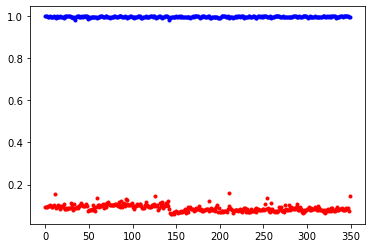

In [178]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c='red', markersize = 3)
plt.plot(x_len, y_acc, "o", c='blue', markersize = 3)
plt.show()